symboling
False    204
Name: count, dtype: int64

normalized-losses
False    164
True      40
Name: count, dtype: int64

make
False    204
Name: count, dtype: int64

fuel-type
False    204
Name: count, dtype: int64

aspiration
False    204
Name: count, dtype: int64

num-of-doors
False    202
True       2
Name: count, dtype: int64

body-style
False    204
Name: count, dtype: int64

drive-wheels
False    204
Name: count, dtype: int64

engine-location
False    204
Name: count, dtype: int64

wheel-base
False    204
Name: count, dtype: int64

length
False    204
Name: count, dtype: int64

width
False    204
Name: count, dtype: int64

height
False    204
Name: count, dtype: int64

curb-weight
False    204
Name: count, dtype: int64

engine-type
False    204
Name: count, dtype: int64

num-of-cylinders
False    204
Name: count, dtype: int64

engine-size
False    204
Name: count, dtype: int64

fuel-system
False    204
Name: count, dtype: int64

bore
False    200
True       4
Name: count, dtype: 

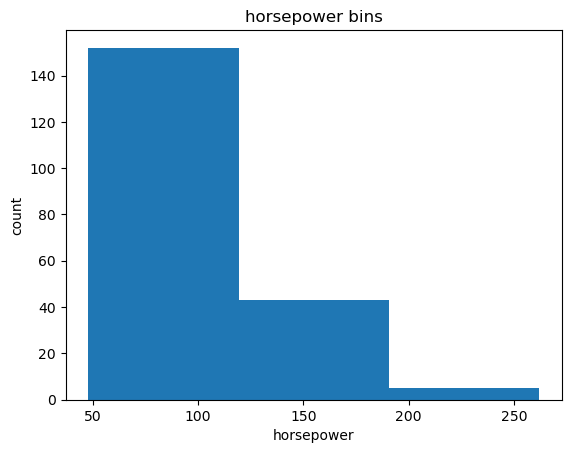

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # import pyplot correctly

# Load the dataset from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(file_path)

#  Assign column names for better readability
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
           "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
           "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

#  Replace '?' with NaN for missing data handling
df = df.replace('?', np.nan)

#  Check for missing data
missing_data = df.isnull()
for column in missing_data:
    print(missing_data[column].value_counts())
    print('')

#  Handle missing numerical data by replacing NaN with the column mean
num_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for col in num_cols:
    df[col] = pd.to_numeric(df[col])
    avg = df[col].mean()
    df[col] = df[col].replace(np.nan, avg)

#  Handle missing categorical data (num-of-doors) by replacing with most frequent value
freq_door = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'] = df['num-of-doors'].replace(np.nan, freq_door)

# Drop rows where price is missing
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

# Convert mpg to L/100km for city and highway
df['city-L/100km'] = 235 / df["city-mpg"]
df['highway-L/100km'] = 235 / df["highway-mpg"]

# Normalize length, width, and height to 0-1 range
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

#  Bin horsepower into categories
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

#  Plot histogram for horsepower bins
plt.hist(df["horsepower"], bins=3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

#  Create dummy variables for categorical column 'fuel-type'
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

#  Merge dummy variables into original dataframe
df = pd.concat([df, dummy_variable_1], axis=1)

# Save cleaned dataset to local folder
df.to_csv("data/cleaned_data.csv", index=False)
